In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ecg_data = pd.read_csv('LP-IV-datasets/ECGdataset(Ass4)/ecg_autoencoder_dataset.csv')

In [3]:
scalar = StandardScaler()
X = scalar.fit_transform(ecg_data.values)
y = X

In [4]:
X_train,X_test,_,_ = train_test_split(X,X,test_size=0.2,random_state=42)

In [5]:
input_dim = X_train.shape[1]
encoder = models.Sequential(
    [
        layers.Input(shape=(input_dim,)),
        layers.Dense(32,activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(8,activation='relu'),
    
    ]
)

In [6]:
input_dim = X_train.shape[1]
decoder = models.Sequential(
    [
        layers.Input(shape=(8,)),
        layers.Dense(16,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(input_dim,activation='linear'),

    ]
)

In [7]:
autoencoder = models.Sequential([
    encoder,
    decoder
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
125/125 [==============================] - 1s 1ms/step - loss: 0.7128
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3935
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2919
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2580
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2412
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2245
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2139
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2063
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2005
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1966
Epoch 11/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 12/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1871
Epoch 13/100


125/125 [==============================] - 0s 1ms/step - loss: 0.1028
Epoch 100/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1019


In [8]:
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power((y_pred - X_test),2),axis=1)

32/32 [==============================] - 0s 882us/step


In [9]:
threshold = np.percentile(mse,95)

In [10]:
anamolies = mse > threshold

In [11]:
num_anamolies = np.sum(anamolies)
print(f"Number of Anomalies: {num_anamolies}")

Number of Anomalies: 50


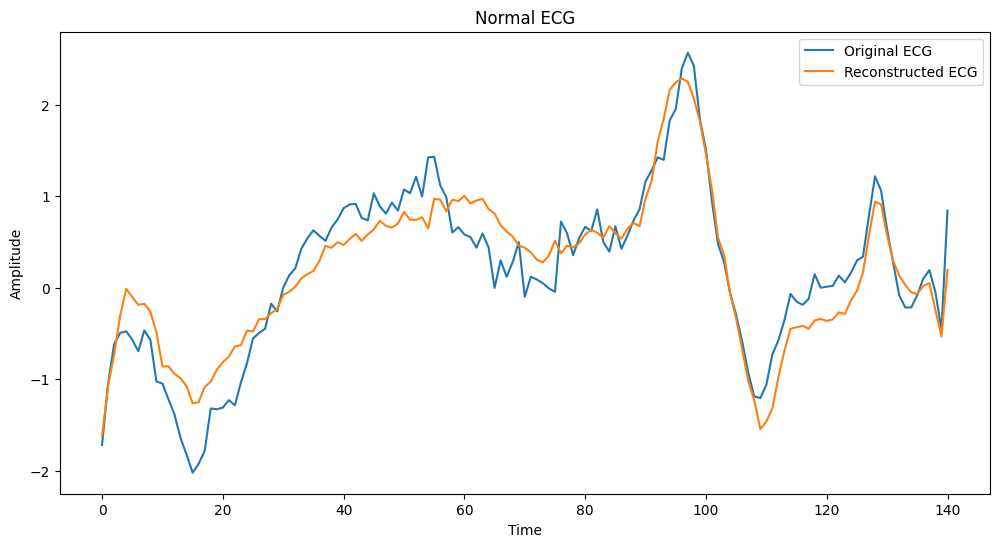

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()